# GMV  

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdate

# df=pd.read_excel("ymtdata/gmv.xlsx",sheetname="Sheet3")
# fig=plt.figure(figsize=(45,9))

# plt.plot(df["paydate"],df["GMV"]/1000000,'g-o')
# plt.grid(True)
# ax1 = fig.add_subplot(1,1,1)
# ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
# #plt.plot.set_major_formatte(mdate.DateFormatter('%Y-%m-%d'))
# plt.xticks(pd.date_range("2018-01-01","2018-04-30"),rotation=45)

# plt.xlabel("paydate")
# plt.ylabel("gmv/millions")

# plt.show()
# #print(df2.head())



# paid GMV by day


- 'r':默认值，表示从文件读取数据。
- 'w':表示要向文件写入数据，并截断以前的内容
- 'a':表示要向文件写入数据，添加到当前内容尾部
- 'r+':表示对文件进行可读写操作（删除以前的所有数据）
- 'r+a'：表示对文件可进行读写操作（添加到当前文件尾部）
- 'b':表示要读写二进制数据
# string 函数

/Users/four/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


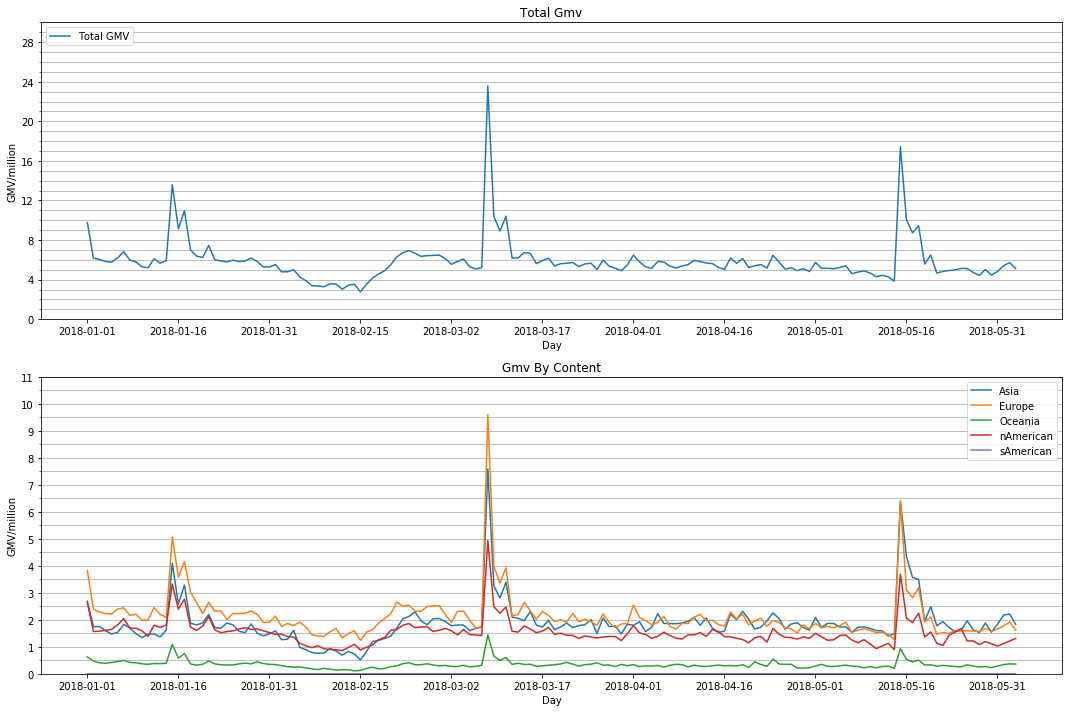

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from matplotlib.font_manager import FontProperties

def plotData(data):
      
    #数据处理
    total=data['Total']
    content=data.drop(['Total'],axis=1)
    col=content.columns
    x=data.index.get_values()

    
    
#     fig=plt.figure(figsize=(15,10))# 设定图片大小 等同于下面语句
    fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(15, 10), tight_layout=True)
    
    #绘制by洲的gmv
#     ax1=fig.add_subplot(2,1,2)
    ax1.yaxis.set_major_locator(mticker.MultipleLocator(1)) #设置y坐标主刻度间隔
    ax1.yaxis.set_minor_locator(mticker.MultipleLocator(0.5)) #设置y坐标次刻度间隔
    ax1.yaxis.grid(True,which='minor') #显示y轴次刻度线条
    ax1.xaxis.set_major_locator(mdates.DayLocator())#设置x坐标轴主刻度为日期
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))#设置x轴日期显示格式
    ax1.xaxis.set_major_locator(mticker.MultipleLocator(15))#设置x坐标刻度间距15天间隔
    ax1.set_ylim(0,11)   
    ax1.set_xlabel("Day")
    ax1.set_ylabel("GMV/million")
    ax1.set_title("Gmv By Content")
    ax1.legend(loc="upper left")
#     ax1.set_xticks(rotation=90)
  
    
    #绘制total的gmv
#     ax2=fig.add_subplot(2,1,1)
    ax2.yaxis.set_major_locator(mticker.MultipleLocator(4))
    ax2.yaxis.set_minor_locator(mticker.MultipleLocator(1))
    ax2.yaxis.grid(True,which='minor')
    ax2.xaxis.set_major_locator(mdates.DayLocator())
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax2.xaxis.set_major_locator(mticker.MultipleLocator(15))
#     ax2.set_xticks(rotation=90)
   
#     ax2.xaxis.startswith('2018-01-01')
    ax2.set_title("Total Gmv")
#     ax2.set_xlim('2017-12-25','2018-05-12')
    ax2.set_ylim(0,30)
    ax2.set_xlabel('Day')
    ax2.set_ylabel('GMV/million')
    ax2.legend(fontsize=10)
                                                               
    #整理各大洲x、y轴数据
  
    for item in col:
        yvalue=data[item]/1000000
        ax1.plot(x,yvalue,'-',label=item)
        ax1.legend(loc="best",fontsize=10)
        
      
    yTotal=total/1000000 #total 中的y轴数据
    ax2.plot(x,yTotal,"-",label="Total GMV")
    ax2.legend(loc="upper left",fontsize=10)
#     plt.legend([ax2],loc="upper right")
    
#     plt.xticks(rotation=90)
#     plt.plot()
    plt.show()

    

# 亚洲 Asia 欧洲 Europe  非洲 Africa   北美洲 nAmerican  南美洲 sAmerican 大洋洲 Oceania 非洲 Africa 南极洲 sAmerican  欧洲 Europe
def transformData(gmv):  
    gmv.drop(gmv.index.get_values()[-1],inplace=True)# 删除最后一行汇总数据
    df_con=gmv[['Day of 付全款时间','买手洲','GMV']]
   
    
    #replace the content
    col=df_con.columns.values.tolist()
    conChines=['亚洲','欧洲','非洲','北美洲','南美洲','大洋洲','南极洲']
    conEnglish=['Asia','Europe','Africa','nAmerican','sAmerican','Oceania','sAmerican']
    df_con=df_con.replace(conChines,conEnglish)#将洲中文转换英文
    
    #replace the column name
#     newName={"Day of 付全款时间":"payday", "买手洲":"location", "订单数":"ordernum", "GMV":"gmv", "取消订单数":"canlnum", "取消GMV":"canlgmv", "作弊订单数":"cheatnum",  "退货退款订单数":"returnnum"}
    newName={"Day of 付全款时间":"payday"}
    df_con=df_con.rename(columns=newName) 
    df=df_con.pivot_table('GMV',index=['payday'],columns=['买手洲'],fill_value=0)
    return df
    
       

gmv=pd.read_excel("ymtdata/2018gmv.xlsx",sheetname="20180604")
df_gmv=transformData(gmv)

plotData(df_gmv)


# df_total=df_gmv[df_gmv["买手洲"]=="Total"]
# df_content=df_gmv[~ df_gmv["买手洲"].str.startswith('Total')]#去掉total数值
# df_content=df_content[~ df_content["买手洲"].str.startswith('南美洲')]#去掉南美洲
# plotDate(df_content,df_total,col,1,0,3)










In [ ]:
help(pd.D)

# 物流公司重订阅配置

In [8]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns


# df=pd.read_excel("data/重订阅配置20180426.xlsx",sheetname="20180503日配置信息")
# df2=df.pivot_table(index=["物流公司名称"],columns=None,aggfunc='count',values="订阅code.1")
# #print(df.head())
# #print(df2)
# #print(df["id"].count())
# df_youzheng=df[df["订阅code.1"]=="youzhengguoji"]["订阅code"]
# df_ems=df[df["订阅code.1"]=="ems"]["订阅code"]
# df_code=df["订阅code"]

# # remove the duplicates data
# df_code=df_code.drop_duplicates()

# df_else=[]
# df_both=[]
# for item in df_youzheng:
#     for item2 in df_ems:
#         if item==item2:
#             df_both.append(item)

# for item4 in df_code:
#     if item4 not in df_both:
#             df_else.append(item4)

# #print(df_youzheng.count())
# # print(df_ems.count())
# # print(len(df_both))
# #print(df_both)
            

# #print(df[df["订阅code.1"]=="ems"].count())
# #print(df[df["订阅code.1"]=="ems"].count())

# #help(pd.pivot_table)



# #df[df["订阅code"]=="Y051"]
# dat3=df[df["订阅code"]=="Y076"]
# print(len(set(df_both)))
# print(len(df_code))
# print(len(set(df_else)))
# df_else
# dat3

# #print(df_both)


# 退货退款原因分布分析

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def returnReason(filename,sheetname1):
    df=pd.read_excel(filename,sheetname=sheetname1)
    df_toushi=df.pivot_table(index=["退款原因"],columns=["何时申请退款"],values="订单号",aggfunc="count")
    df_toushi=df_toushi.fillna(0)
    #add the sum columns 
    df_toushi["col_sum"]=df_toushi.apply(lambda x:x.sum(),axis=1)
    #add the sum rows
    df_toushi.loc["row_sum"]=df_toushi.apply(lambda x:x.sum())

    total=float(df_toushi.iloc[-1:,-1:].values)

    df_toushi["接单前占比"]=df_toushi["接单前"]/total
    df_toushi["接单后占比"]=df_toushi["接单后"]/total
    return df_toushi


if __name__=="__main__":
    data=returnReason("data/退货退款明细数据需求20180424-20180503.xlsx","Sheet1")
    data4=pd.DataFrame(data)
    data4
    
    


In [9]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np



# df=pd.read_excel("data/退货退款明细数据需求20180424-20180503.xlsx",sheetname="Sheet1")
# df_toushi=df.pivot_table(index=["退款原因"],columns=["何时申请退款"],values="订单号",aggfunc="count")
# df_toushi=df_toushi.fillna(0)
#     #add the sum columns 
# df_toushi["col_sum"]=df_toushi.apply(lambda x:x.sum(),axis=1)
#     #add the sum rows
# df_toushi.loc["row_sum"]=df_toushi.apply(lambda x:x.sum())

# total=float(df_toushi.iloc[-1:,-1:].values)

# df_toushi["接单前占比"]=df_toushi["接单前"]/total
# df_toushi["接单后占比"]=df_toushi["接单后"]/total
# df_toushi

    

In [49]:
# df["客服定责"]=df["客服定责"].fillna("no")
# df_dz=df[df["客服定责"]!="no"]
# df_before0428=df_dz[df_dz[""]]
# df_after042

# 发货量订阅量对比

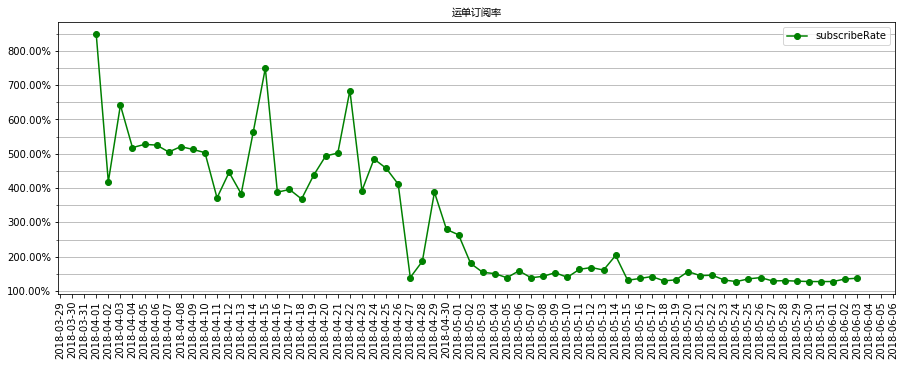

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import matplotlib.ticker as mticker  
from matplotlib.font_manager import FontProperties

def plotData(data):
    
    myfont = FontProperties(fname='/Library/Fonts/msyh.ttf')#设置画图中显示中文
    
    x=data.index #define xaxis value
    y=data["订阅rate"]*100 #define yaxis value 扩大100倍显示为百分数
     
    fig1 = plt.figure(figsize=(15,5)) #define the figure
    ax1 = fig1.add_subplot(1,1,1)   #define the figure
    
    # ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax1.xaxis.set_major_locator(mdate.DayLocator())# 指定横坐标显示的为日期类型
    ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))#指定横坐标日期显示格式
    ax1.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f%%' ))#指定纵坐标显示为百分数
    ax1.xaxis.set_major_locator(mticker.MultipleLocator(1))#指定x轴两个间隔的距离为1,即显示出数据中所有日期
    
    ax1.yaxis.set_major_locator(mticker.MultipleLocator(100)) #将y轴主刻度标签设置为100的倍数 
    ax1.yaxis.set_minor_locator(mticker.MultipleLocator(50))#将此y轴次刻度标签设置为50的倍数  
    
    # ax1.xaxis.grid(True, which='major') #x坐标轴的网格使用主刻度  
    ax1.yaxis.grid(True, which='minor') #y坐标轴的网格使用次刻度显示网格 
    
    #设置主刻度标签的位置,标签文本的格式  
    # ax1.xaxis.set_major_locator(xmajorLocator)  
    # ax1.xaxis.set_major_formatter(xmajorFormatter) 
    
#     plt.ylim(100,900)
    plt.xticks(rotation=90)
    plt.title("运单订阅率",FontProperties=myfont)
    ax1.plot(x,y,'go-',label='subscribeRate')
    plt.legend(loc="best")
    plt.show()
 

df=pd.read_excel("ymtdata/2018wuliu.xlsx",sheetname="天订阅量")
data=pd.DataFrame(df.groupby("day")["订阅rate"].sum())
plotData(data)


# 订阅源数据分析

In [95]:
import pandas  as pd
import matplotlib.pyplot as plt

df_subsource=pd.read_excel("ymtdata/2018wuliu.xlsx",sheetname="订阅渠道数据")
df_data=df_subsource.pivot_table('num',index=['subday'],columns=['subsource'],fill_value=0).tail(8)
df_data=df_data.drop([0,1],axis=1)
df_data['sum']=df_data.apply(lambda x:x.sum(),axis=1)
df_data['rate']=df_data[6]/df_data['sum']
df_data


subsource,2,3,4,5,6,7,sum,rate
subday,,,,,,,,
2018-05-15,41,157,37,11,1135,339,1720,0.659884
2018-05-16,38,131,45,16,1088,321,1639,0.663819
2018-05-17,42,165,35,19,1030,437,1728,0.596065
2018-05-18,26,170,47,13,1009,284,1549,0.651388
2018-05-19,29,104,23,16,934,178,1284,0.727414
2018-05-20,22,61,16,19,945,316,1379,0.685279
2018-05-21,37,143,67,19,1338,437,2041,0.655561
2018-05-22,52,156,55,9,990,356,1618,0.611867


#  精选买手处罚扣款分析

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_excel("data/退单原因20180403.xlsx",sheetname="Sheet1")

df4=df.iloc[0:30,:]
df5=pd.DataFrame(df4.groupby(["何时申请退款","退款原因"])["订单号"].count())
df6=df5.pivot_table(index="退款原因",columns="何时申请退款",values="订单号")
df6=df6.fillna(0)
print(df5)
print(df6)
print(df7

# 物流链路修正


In [1]:
import pandas as pd

df1=pd.read_excel('ymtdata/物流链路修正数据20180621.xlsx',sheetname='43-513')
df2=pd.read_excel('ymtdata/物流链路修正数据20180621.xlsx',sheetname='608-614')
df3=pd.read_excel('ymtdata/物流链路修正数据20180621.xlsx',sheetname='615-619')
df4=pd.read_excel('ymtdata/物流链路修正数据20180621.xlsx',sheetname='514-607')
df5=pd.read_excel('ymtdata/物流链路修正数据20180621.xlsx',sheetname='620-621')


In [62]:
num_total=df["订单号"].count()

In [27]:
df_bf_accp=df[df["何时申请退款"]=="接单前"]
df_af_accp=df[df["何时申请退款"]=="接单后"]

In [44]:
num_bf_accp=df_bf_accp["订单号"].count()
num_af_accp=df_af_accp["订单号"].count()

## define  a function to compute the rate

In [57]:
def getrate(inputpd):
    num_total=inputpd["订单号"].count()
    num_group=pd.DataFrame(inputpd.groupby(["退款类型","退款原因"])["订单号"].count())
    num_group["rate"]=num_group["订单号"]/num_total
    return num_group
    

In [58]:
num_bf_rate=getrate(df_bf_accp)
print(num_bf_rate)

                 订单号      rate
退款类型 退款原因                     
仅退款  不喜欢/不想要     765  0.193622
     买卖双方协商一致    290  0.073399
     买手缺货        883  0.223488
     买手长时间不发货    158  0.039990
     拍错了        1610  0.407492
     有其他优惠购买方式   229  0.057960
     没有收到货        16  0.004050


In [51]:
num_af_rate=getrate(df_af_accp)
print(num_af_rate)

                           订单号      rate
退款类型 退款原因                               
仅退款  不喜欢/不想要               989  0.137648
     买卖双方协商一致             1186  0.165066
     买卖家协商一致               480  0.066806
     买手缺货                  476  0.066249
     买手长时间不发货              350  0.048713
     其他                     62  0.008629
     包裹少件/破损/空包              5  0.000696
     发错货/少件/空包/包装破损         24  0.003340
     商品质量问题                  1  0.000139
     商品质量问题（瑕疵、性能)          18  0.002505
     多拍/错拍/不想要了            171  0.023800
     实物与商品描述不符（色差、尺码、规格）     9  0.001253
     快递一直未到                111  0.015449
     拍错了                  1176  0.163674
     有其他优惠购买方式             191  0.026583
     未按约定时间接单/发货            71  0.009882
     没有收到货                  37  0.005150
     疑似假冒品牌                 15  0.002088
     缺货                     42  0.005846
     长时间未收到货              1101  0.153236
退货退款 七天无理由退货                 5  0.000696
     买卖双方协商一致              191  0.026583
     买卖家协商一致    

In [42]:
num_after=pd.DataFrame(df_bf_accp.groupby(["退款类型","退款原因"])["订单号"].count())
num_after["rate"]=num_after["订单号"]/num_bf_accp
print(num_after)

                 订单号      rate
退款类型 退款原因                     
仅退款  不喜欢/不想要     765  0.193622
     买卖双方协商一致    290  0.073399
     买手缺货        883  0.223488
     买手长时间不发货    158  0.039990
     拍错了        1610  0.407492
     有其他优惠购买方式   229  0.057960
     没有收到货        16  0.004050


In [4]:
# df_af_accp.groupby(["退款类型","退款原因"])["订单号"].count()

In [17]:
df_20180403=pd.read_excel("data/退单原因20180403.xlsx",sheetname="Sheet1")
df_20180403.groupby("退款类型").count()

,订单号,订单类型,买手名,退款原因,客服定责,何时申请退款,订单付款时间,退单申请时间
退款类型,,,,,,,,
仅退款,67270,67270,67270,66934,3600,67270,67270,67270
退货退款,3301,3301,3301,3286,697,3301,3301,3301


In [18]:
df_20180403.groupby(["退款类型","退款原因"]).count()

订单号   订单类型    买手名  客服定责  何时申请退款  订单付款时间  退单申请时间
退款类型 退款原因                                                                  
仅退款  不喜欢/不想要              11458  11458  11458   128   11458   11458   11458
     买卖双方协商一致               426    426    426     4     426     426     426
     买卖家协商一致               3292   3292   3292    19    3292    3292    3292
     买手缺货                  8251   8251   8251   558    8251    8251    8251
     买手长时间不发货               136    136    136     2     136     136     136
     其他                   19016  19016  19016   308   19016   19016   19016
     包裹少件/破损/空包              12     12     12     0      12      12      12
     发错货                     59     59     59     4      59      59      59
     发错货/少件/空包/包装破损          23     23     23     1      23      23      23
     商品与实物描述不符（色差、尺码、规格）     17     17     17     0      17      17      17
     商品破损                    65     65     65     5      65      65      65
     商品质量问题                  75     75     75    20      75      75      75
     商品质量问题（瑕疵、性能)            5      5      5     1       5       5       5
     多拍/错拍/不想要了            1795   1795   1795    23    1795    1795    1795
     实物与商品描述不符（色差、尺码、规格）      4      4      4     0       4       4       4
     对买手的服务不满意             1031   1031   1031   399    1031    1031    1031
     少件/空包                   83     83     83     2      83      83      83
     快递/物流无跟踪记录            3082   3082   3082  1640    3082    3082    3082
     快递一直未到                 709    709    709    45     709     709     709
     拍错了                    867    867    867     5     867     867     867
     有其他优惠购买方式             4302   4302   4302    33    4302    4302    4302
     未按约定时间发货              1255   1255   1255    99    1255    1255    1255
     未按约定时间接单/发货            424    424    424    41     424     424     424
     没有收到货                   17     17     17     1      17      17      17
     疑似假冒品牌                   1      1      1     0       1       1       1
     缺货                     422    422    422     2     422     422     422
     规格选错                  9585   9585   9585    54    9585    9585    9585
     退运费                     44     44     44     3      44      44      44
     长时间未收到货                475    475    475   188     475     475     475
     颜色/款式/图案/尺码等描述不符         3      3      3     1       3       3       3
退货退款 七天无理由退货                 17     17     17     3      17      17      17
     不喜欢/不想要                252    252    252    42     252     252     252
     买卖双方协商一致               233    233    233    10     233     233     233
     买卖家协商一致                187    187    187     6     187     187     187
     其他                     858    858    858   172     858     858     858
     包裹少件/破损/空包              18     18     18     5      18      18      18
     发错货                    323    323    323    27     323     323     323
     发错货/少件/空包/包装破损          31     31     31     1      31      31      31
     商品与实物描述不符（色差、尺码、规格）    221    221    221    64     221     221     221
     商品破损                   127    127    127    22     127     127     127
     商品质量问题                 398    398    398   120     398     398     398
     商品质量问题（瑕疵、性能)           44     44     44     5      44      44      44
     实物与商品描述不符（色差、尺码、规格）     46     46     46     6      46      46      46
     对买手的服务不满意               14     14     14    13      14      14      14
     少件/空包                   19     19     19     3      19      19      19
     有其他优惠购买方式               11     11     11     4      11      11      11
     没有收到货                    2      2      2     0       2       2       2
     疑似假冒品牌                 210    210    210   130     210     210     210
     规格选错                   210    210    210    42     210     210     210
     颜色/款式/图案/尺码等描述不符        65     65     65    19      65      65      65

In [83]:
import pandas as pd
df_dingze=pd.read_excel("data/退单定责20180413.xlsx",sheetname="Sheet1")
total=df_dingze["ReturnApplyBillId"].count()
print(total)
df1=pd.DataFrame(df_dingze.groupby("ResponsableOpName")["ReturnApplyBillId"].count())
print(df1)
print(df_dingze.head(1))

675
                   ReturnApplyBillId
ResponsableOpName                   
刘兵杰                                1
刘琦栋                                5
周迪                                 3
周韦                                 4
宋怡文                                9
张顺                                 1
施虹                                 6
李师雄                               15
李思宇                                3
李琳                                 3
杜伟                                 1
毛慈丽                               16
祝晓波                                6
系统                               557
董旻                                18
蒋鑫                                 4
袁丽娜                                4
谢炜                                 1
陈雯                                 1
须佳彬                                7
顾冶青                                5
马珮瑛                                5
  ReturnApplyBillId    OrderId   BuyerId BuyerLoginId  SellerId SellerLoginId  \
0      TH1804022890  133018

In [64]:
#系统判定
df_xitong=df_dingze[df_dingze["ResponsableOpName"]=="系统"]
num_xt=df_xitong["ReturnApplyBillId"].count()
rate_xt=num_xt/total
print("系统判责退单数量: %s 单,占比 %s" %(num_xt,rate_xt))

系统判责退单数量: 557 单,占比 0.825185185185


In [65]:
#人工判定
df_rg=df_dingze[df_dingze["ResponsableOpName"]!="系统"]
num_rg=df_rg["ReturnApplyBillId"].count()
rate_rg=num_rg/total
print("人工判则退单数量：%s 单,占比 %s" %(num_rg,rate_rg))


人工判则退单数量：118 单,占比 0.174814814815


In [66]:
#系统判定买手责任、非买手责任
df_xms=df_xitong[df_xitong["ResponsableRemark"]=="系统自动判定为买手责任"]["ReturnApplyBillId"].count()
df_xfms=df_xitong[df_xitong["ResponsableRemark"]=="系统自动判定为非买手责任"]["ReturnApplyBillId"].count()
rate_xms=df_xms/num_xt
rate_xfms=df_xfms/num_xt
print("系统判定为买手责任:%s,占比%s" %(df_xms,rate_xms))
print("系统判定为非买手责任:%s,占比%s" %(df_xfms,rate_xfms))

系统判定为买手责任:347,占比0.622980251346
系统判定为非买手责任:210,占比0.377019748654


In [84]:
#人工判定买手责任、非买手责任、长时间未发货、长时间未收到货
num_xhrgwf=df_rg[df_rg["ResponsableResonId"]==5 ]["ReturnApplyBillId"].count()  #人工超时未发货数量
#num_xhrgws=df_rg[df_rg["ResponsableResonId"]==6 and df_rg["IsPreSale"]=="False" ]["ReturnApplyBillId"].count()  #人工超时未收货数量

#num_xhxtwf=df_xitong[df_xitong["ResponsableResonId"]==5 and df_xitong["IsPreSale"]=="False"]["ReturnApplyBillId"].count()  #系统超时未发货数量
#num_xhxtws=df_xitong[df_xitong["ResponsableResonId"]==6 and df_xitong["IsPreSale"]=="False"]["ReturnApplyBillId"].count()  #人工超时未收货数量

print("人工定责超时未发货单量：%s" %num_xhrgwf)
#print("人工定责超时未收货单量：%s" %num_xhrgws)

#print("系统定责超时未发货单量：%s" %num_xhxtwf)
#print("系统定责超时未发货单量：%s" %num_xhxtws)



人工定责超时未发货单量：24


In [24]:
df_xitong=df_dingze[df_dingze["ResponsableOpName"]=="系统"]
df_xtcount=pd.DataFrame(df_xitong.groupby(["ResponsableRemark","ResponsableResonId"])["ReturnApplyBillId"].count())
df_xt=df_xtcount.pivot_table(index="ResponsableRemark",columns="ResponsableResonId",values="ReturnApplyBillId")
#print(df_xt["ResponsableResonId"])
#print(df_xtcount)
print(df_xt.fillna(0))


ResponsableResonId      4      5     6
ResponsableRemark                     
系统自动判定为买手责任         347.0    0.0   0.0
系统自动判定为非买手责任         25.0  135.0  50.0


In [23]:
df_rg=df_dingze[df_dingze["ResponsableOpName"]!="系统"]

df_rg=pd.DataFrame(df_rg.groupby(["ResponsableType","ResponsableResonId"])["ReturnApplyBillId"].count())
df_rg=df_rg.pivot_table(index="ResponsableType",columns="ResponsableResonId",values="ReturnApplyBillId")
print(df_rg.fillna(0))


ResponsableResonId  -1     1     2    3     4     5    7    15
ResponsableType                                               
0                   0.0   0.0   0.0  0.0  13.0  24.0  5.0  1.0
1                   0.0  53.0  11.0  2.0   0.0   0.0  0.0  0.0
3                   1.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0
6                   8.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0


In [52]:
import pandas as pd
df=pd.read_csv("data/DqFUkzIC7560.2018-03.log",delimiter="|",header=None)
df.columns=["date","key","expresscode","code"]
print(df.head())


                  date           key    expresscode              code
0  2018-03-01 00:00:07  DqFUkzIC7560  huitongkuaidi    50624750906150
1  2018-03-01 00:00:09  DqFUkzIC7560  huitongkuaidi  5600000700066659
2  2018-03-01 00:00:22  DqFUkzIC7560  huitongkuaidi  5600000700066678
3  2018-03-01 00:00:22  DqFUkzIC7560  huitongkuaidi  5600000800066705
4  2018-03-01 00:00:45  DqFUkzIC7560    japanposten     CD330791969JP


In [55]:
df_count=pd.DataFrame(df.groupby("expresscode")["code"].count())
df_greaterthan1w=df_count[df_count["code"]>10000]
print(df_greaterthan1w)
#df.groupby("expresscode")["code"].count()

                  code
expresscode           
ems             210005
huitongkuaidi    38466
postdanmarken    15377
shentong         48800
shunfeng         24306
usps             13585
youzhengguoji    18701
youzhengguonei   68929
yunda            16444
zhongtong        10230


In [11]:
df_huitong=df[df["expresscode"]=="huitongkuaidi"]
print(df_huitong.head())

                  date           key    expresscode              code
0  2018-03-01 00:00:07  DqFUkzIC7560  huitongkuaidi    50624750906150
1  2018-03-01 00:00:09  DqFUkzIC7560  huitongkuaidi  5600000700066659
2  2018-03-01 00:00:22  DqFUkzIC7560  huitongkuaidi  5600000700066678
3  2018-03-01 00:00:22  DqFUkzIC7560  huitongkuaidi  5600000800066705
7  2018-03-01 00:02:00  DqFUkzIC7560  huitongkuaidi    70092532450318


In [40]:
df_matou=pd.read_csv("data/logistics_subscribe_20180425.txt",delimiter="\\t",header=None)
df_matou.columns=["id","code","company","platform","expresscode","status2","status","addtime"]
df_matou.to_excel("data/logistics_subscribe_20180425.xlsx")
print(df_matou.head())

/Users/four/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


       id              code company  platform    expresscode  status2  status  \
0  640245    50624750906150    Y058         2  huitongkuaidi        2     200   
1  640250  5600000700066659    Y058         2  huitongkuaidi        2     200   
2  640251  5600000700066678    Y058         2  huitongkuaidi        2     200   
3  640252  5600000800066705    Y058         2  huitongkuaidi        2     200   
4  640256    70092532450318    Y134         2  huitongkuaidi        2     200   

               addtime  
0  2018-03-01 00:00:06  
1  2018-03-01 00:00:08  
2  2018-03-01 00:00:21  
3  2018-03-01 00:00:21  
4  2018-03-01 00:01:59  


In [30]:
df_ma=pd.DataFrame(df_matou["code"].drop_duplicates())
df_kuai=df_huitong["code"]
print(df_ma.count())
print(df_kuai.count())
print(df_ma.head())

code    38211
dtype: int64
38466
               code
0    50624750906150
1  5600000700066659
2  5600000700066678
3  5600000800066705
4    70092532450318


In [32]:
df4=df_ma[df_ma["code"]=="000000000"]
print(df4.head())

           code
9182  000000000


In [5]:
# df_ma_count=df_matou.groupby("code")["id"].count()
# print(df_ma_count)

In [65]:
df_cheat=pd.read_csv("data/重订阅无结果20180427.txt",delimiter="\\t")
df_cheat.to_excel("data/重订阅无结果20180427.xlsx")
print(df_cheat.head())

/Users/four/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


        id       bill_no  sub_platform external_express_code ymt_express_code  \
0  4914768  700171058593             2                   ems             Y013   
1  4914769  248992038968             2         youzhengguoji             Y100   
2  4914770  248992038968             2        youzhengguonei             Y153   
3  4914772  700171058581             2                   ems             Y013   
4  4914774  700171058580             2                   ems             Y013   

  biz_no  sub_source  sub_status  sub_num ret_code  recv_flag  recv_status  \
0    NaN           4           2       11      200          0            1   
1    NaN           4           2       12      200          0            1   
2    NaN           4           2       12      200          0            1   
3    NaN           4           2       11      501          0            1   
4    NaN           4           2       14      200          0            1   

                   create_time              

# 物流信息订阅返回情况
- 订阅平台: 
    - 2 快递100  
    - 3 trackingmore 
    - 4 菜鸟

In [6]:
# import pandas  as pd
# # load deleviry company
# # f=open("ymtdata/ExpressCompany_180508.xls","r")
# # print(f.read())


# # # for row in data:
# # #     item=row.split(",")
# # #     print(item)
# df_company=pd.read_excel("ymtdata/ExpressCompany_180508.xls",encoding)
# # load dingyue data
# df_dy=pd.read_excel("ymtdata/wuliu.xlsx",sheetname="订阅201804")
# print(df_dy.count())

In [7]:
# import numpy as np
# a=np.empty(5)
# b=np.zeros(4)
# k=np.ones((5,4),dtype=np.int_)
# c=np.eye(3)
# print(a)
# print(b)
# print(c)
# print(k)

/Users/four/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['YaHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


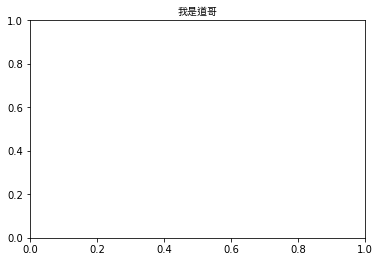

In [3]:
import numpy as np  
import pandas as pd  
import matplotlib  
import pylab  
from matplotlib.font_manager import FontManager, FontProperties  
import subprocess  
import matplotlib.pyplot as plot  
  
from matplotlib.font_manager import FontManager, FontProperties   
def getChineseFont():  
    return FontProperties(fname='/System/Library/Fonts/PingFang.ttc')  
  
if __name__ == '__main__':  
    plot.title(u"我是道哥", fontproperties=getChineseFont())  
    plot.show()  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import matplotlib.ticker as mticker  
from matplotlib.font_manager import FontProperties


# from pylab import *  
# from matplotlib.ticker import MultipleLocator, FormatStrFormatter  
  
# xmajorLocator   = MultipleLocator(20) #将x主刻度标签设置为20的倍数  
# xmajorFormatter = FormatStrFormatter('%1.1f') #设置x轴标签文本的格式  
# xminorLocator   = MultipleLocator(5) #将x轴次刻度标签设置为5的倍数  
  
# ymajorLocator   = MultipleLocator(100) #将y轴主刻度标签设置为0.5的倍数  
# ymajorFormatter = FormatStrFormatter('%1.1f') #设置y轴标签文本的格式  
# yminorLocator   = MultipleLocator(50) #将此y轴次刻度标签设置为0.1的倍数




# font = FontProperties(fname='/Library/Fonts/msyh.ttf')
myfont = FontProperties(fname='/Library/Fonts/msyh.ttf')
# matplotlib.rcParams['axes.unicode_minus']=False
#plot to show Chinese
# matplotlib.rcParams['font.family']='NSimSun'



df=pd.read_excel("ymtdata/2018wuliu.xlsx",sheetname="天订阅量")
# data=pd.DataFrame(df.groupby("day")["订阅rate"].sum(),columns=["day","subscriberate"]) 
data=pd.DataFrame(df.groupby("day")["订阅rate"].sum())

#define the x and y
x=data.index
y=data["订阅rate"]*100



fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(1,1,1)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

# 横坐标日期显示格式
ax1.xaxis.set_major_locator(mdate.DayLocator())
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d')) 
# 纵坐标数字显示为百分数
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f%%' ))

#修改横轴密度,显示全部,两个间隔间的距离为1
ax1.xaxis.set_major_locator(mticker.MultipleLocator(1))



#设置主刻度标签的位置,标签文本的格式  
# ax1.xaxis.set_major_locator(xmajorLocator)  
# ax1.xaxis.set_major_formatter(xmajorFormatter)  
  
ax1.yaxis.set_major_locator(mticker.MultipleLocator(100)) #将y轴主刻度标签设置为100的倍数  
# ax1.yaxis.set_major_formatter(ymajorFormatter)  
  
#显示次刻度标签的位置,没有标签文本  
# ax1.xaxis.set_minor_locator(xminorLocator)  
ax1.yaxis.set_minor_locator(mticker.MultipleLocator(50))#将此y轴次刻度标签设置为50的倍数  
  
# ax1.xaxis.grid(True, which='major') #x坐标轴的网格使用主刻度  
ax1.yaxis.grid(True, which='minor') #y坐标轴的网格使用次刻度 



# plt.xticks(pd.date_range(data.index[0],data.index[-1],freq='1min'))
plt.ylim(100,900)
plt.xticks(rotation=90)
plt.title("运单订阅率",FontProperties=myfont)
ax1.plot(x,y,'g-o',label='subscribeRate')
plt.legend(loc="best")
plt.show()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from matplotlib.font_manager import FontProperties

def plotDate(data,total,items,lanum,x,y):
#     fig=plt.figure(figsize=(15,10))# 设定图片大小 等同于下面语句
    fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(15, 10), tight_layout=True)
    
    #绘制by洲的gmv
#     ax1=fig.add_subplot(2,1,2)
    ax1.yaxis.set_major_locator(mticker.MultipleLocator(1)) #设置y坐标主刻度间隔
    ax1.yaxis.set_minor_locator(mticker.MultipleLocator(0.5)) #设置y坐标次刻度间隔
    ax1.yaxis.grid(True,which='minor') #显示y轴次刻度线条
    ax1.xaxis.set_major_locator(mdates.DayLocator())#设置x坐标轴主刻度为日期
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))#设置x轴日期显示格式
    ax1.xaxis.set_major_locator(mticker.MultipleLocator(15))#设置x坐标刻度间距15天间隔
    ax1.set_ylim(0,11)   
    ax1.set_xlabel("Day")
    ax1.set_ylabel("GMV/million")
    ax1.set_title("Gmv By Content")
    ax1.legend(loc="upper left")
#     ax1.set_xticks(rotation=90)
  
    
    #绘制total的gmv
#     ax2=fig.add_subplot(2,1,1)
    ax2.yaxis.set_major_locator(mticker.MultipleLocator(4))
    ax2.yaxis.set_minor_locator(mticker.MultipleLocator(1))
    ax2.yaxis.grid(True,which='minor')
    ax2.xaxis.set_major_locator(mdates.DayLocator())
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax2.xaxis.set_major_locator(mticker.MultipleLocator(15))
#     ax2.set_xticks(rotation=90)
   
#     ax2.xaxis.startswith('2018-01-01')
    ax2.set_title("Total Gmv")
#     ax2.set_xlim('2017-12-25','2018-05-12')
    ax2.set_ylim(0,30)
    ax2.set_xlabel('Day')
    ax2.set_ylabel('GMV/million')
    ax2.legend(fontsize=10)
                                                               
    #整理各大洲x、y轴数据
    xvalue=data[items[x]].drop_duplicates()#删除日期列重复项
    lab=[] #存储各大洲信息
    for content in data[items[lanum]]:
        if content not in lab:
            lab.append(content)
    for item in lab:
        yvalue=data[data[items[lanum]]==item][items[y]]/1000000
        ax1.plot(xvalue,yvalue,'-',label=item)
        ax1.legend(loc="best",fontsize=10)
        
      
    yTotal=total[items[y]]/1000000 #total 中的y轴数据
    ax2.plot(xvalue,yTotal,"-",label="Total GMV")
    ax2.legend(loc="upper left",fontsize=10)
#     plt.legend([ax2],loc="upper right")
    
#     plt.xticks(rotation=90)
#     plt.plot()
    plt.show()

    

# 亚洲 Asia 欧洲 Europe  非洲 Africa   北美洲 nAmerican  南美洲 sAmerican 大洋洲 Oceania 非洲 Africa 南极洲 sAmerican  欧洲 Europe
def transformData(df):  
    df.drop(df_gmv.index.get_values()[-1],inplace=True)# 删除最后一行汇总数据
    df_con=df
    
    #replace the content
    col=df_con.columns.values.tolist()
    conChines=['亚洲','欧洲','非洲','北美洲','南美洲','大洋洲','南极洲']
    conEnglish=['Asia','Europe','Africa','nAmerican','sAmerican','Oceania','sAmerican']
    df_con=df_con.replace(conChines,conEnglish)#将洲中文转换英文
    
    #replace the column name
    newName={'Day of 付全款时间':'payday', '买手洲':'location', '订单数':'ordernum', 'GMV':'gmv', '取消订单数':'canlnum', '取消GMV':'canlgmv', '作弊订单数':'cheatnum',
       '退货退款订单数':'returnnum'}
    df_con.replace
    
    
    
    return df_con
    
    

    

df_gmv=pd.read_excel("ymtdata/2018gmv.xlsx",sheetname="201705-201712")
# # df_gmv.drop(df_gmv.index.get_values()[-1],inplace=True)# 删除最后一行汇总数据
# df_total=df_gmv[df_gmv["买手洲"]=="Total"]
# df_con=df_gmv[~ df_gmv["买手洲"].str.startswith('Total')]#去掉total数值
# df_con=df_con[~ df_con["买手洲"].str.startswith('南美洲')]#去掉南美洲

df_gmv=pd.read_excel("ymtdata/2018gmv.xlsx",sheetname="201705-201712")


col=df_con.columns.values.tolist()
conChines=['亚洲','欧洲','非洲','北美洲','南美洲','大洋洲','南极洲']
conEnglish=['Asia','Europe','Africa','nAmerican','sAmerican','Oceania','sAmerican']
df_con=df_con.replace(conChines,conEnglish)#将洲中文转换英文


# print(df_con["买手洲"].drop_duplicates())
# col
# plotDate(df_con,df_total,col,1,0,3)
# help(ax1.set_xticks)

# get the gmv of 2018
df_2018gmv=pd.read_excel("ymtdata/2018gmv.xlsx",sheetname="20180518")
df_2018gmv.drop(df_2018gmv.index.get_values()[-1],inplace=True)# 删除最后一行汇总数据 
df_2018total=df_2018gmv[df_2018gmv["买手洲"]=="Total"]
# df_2018total['month']=df_2018total[df_2018gmv["买手洲"]=="Total"]

df_2018total2=df_2018gmv[df_2018gmv["买手洲"]=="Total"]["GMV"].sum()


df_2018total1.tail(3)['GMV'].sum()

df_2018gmv.columns




NameError: name 'df_con' is not defined

In [11]:
f=open("data/wrong_processed.txt",'r',encoding='gbk')
df=f.read()
print(df[12])


5


In [13]:
import pandas as pd
df=pd.read_excel("ymtdata/category.xlsx")
df_use=df['iCategoryId','iMasterCategory','sCategory','iLevel']

df.head(5)

,iCategoryId,iMasterCategory,sCategory,sCategoryEn,sOpeator,iType,iLevel,sMark,dAddTime,iAction,iOldCategoryId,sort,bIsChildNodeId,bIsAvailable,iTag,sCoreWords,SamplePic,MeasurePic
0,1001,0,手机数码、电脑,Consumer Electronics,sys,1,1,NaN,2012-05-08 17:31:09,0,NaN,120000,False,True,9,NaN,NaN,NaN
1,1002,1001,手机通讯,Mobile Communication,sys,1,2,NaN,2012-05-08 17:31:09,0,NaN,120100,False,True,9,NaN,NaN,NaN
2,1003,1002,按键手机,Keypad Mobile Phone,sys,1,3,NaN,2012-05-08 17:31:09,0,NaN,120101,True,True,9,NaN,NaN,NaN
3,1004,1002,触屏手机,Touch Screen Mobile Phone,sys,1,3,NaN,2012-05-08 17:31:09,0,NaN,120102,True,True,9,NaN,NaN,NaN
4,1013,1001,摄影摄像,Cameras & Photo,sys,1,2,NaN,2012-05-08 17:31:10,0,NaN,120300,False,True,9,NaN,NaN,NaN


In [25]:
import pandas as pd

df=pd.read_excel('ymtdata/费率20180627.xlsx')
df2=df[(df['catelog']!=1259)&(df['catelog']!=1306)]
# df2.to_excel('ymtdata/new费率20180627.xlsx')
df2.describe()


,catelog,价格区间从,价格区间到,佣金费率,单件商品收佣上限/元,单件商品收佣下限/元,注册所在国家地编码
count,993.000000,993.000000,9.930000e+02,993.000000,993.000000,993.0,993.000000
mean,1323.910373,472.004028,6.706996e+07,0.079416,268.700906,0.0,52.204431
std,265.122353,941.098852,4.701910e+07,0.013375,30.645347,0.0,137.162120
min,1001.000000,0.000000,3.000000e+02,0.060000,180.000000,0.0,0.000000
25%,1149.000000,0.000000,3.000000e+03,0.070000,240.000000,0.0,3.000000
50%,1286.000000,0.000000,1.000000e+08,0.080000,240.000000,0.0,7.000000
75%,1368.000000,300.000000,1.000000e+08,0.080000,300.000000,0.0,48.000000
max,2130.000000,3000.000000,1.000000e+08,0.100000,300.000000,0.0,666.000000


In [36]:
#物流费用:
charge={"201712":30181.45,"201801":27214.75,"201802":17967.75,"201803":26137.8,"201804":22648.35,"201805":17506.75}
distinct_num={"201712":35984,"201801":35859,"201802":6628,"201803":3023,"201804":141,"201805":173}

{'201712': 30181.45,
 '201801': 27214.75,
 '201802': 17967.75,
 '201803': 26137.8,
 '201804': 22648.35,
 '201805': 17506.75}

In [28]:
import pandas as pd

df1=pd.read_excel("data/物流多地址测试数据.xlsx",sheetname="线上方案")
# df2=pd.read_excel("data/物流多地址测试数据.xlsx",sheetname="测试方案")
# df_old=df1.iloc[:,0:2]
df_old=df1[["ID_OrderId","flag_old"]]
# df_new=df2[["ID_OrderId","flag_new"]]
df=pd.DataFrame(df_old.groupby("flag_old").count())
df["oldpercent"]= df["ID_OrderId"]/df_old["ID_OrderId"].count()
df

,ID_OrderId,oldpercent
flag_old,,
1,17,0.005031
2,456,0.134951
3,566,0.167505
5,1492,0.441551
6,647,0.191477
7,201,0.059485



- 1	虚假单号:国际段发货后30天，无法获取任何物流信息
- 2	揽收时间异常:物流揽收时间早于订单支付时间
- 3	揽收时间异常:拼邮发货，国内段揽收时间早于国际段签收时间
- 4	虚假单号:国内段发货后30天，无法获取任何物流信息
- 5	签收地异常:拼邮发货，国际段签收地与国内段发货地不一致
- 6	签收地异常:最终签收地与买家地址信息不一致
- 7	货源地不符:海外发货，发货地与买手注册国家不一致
- 8	揽收地异常:订单揽收地与商品所在保税区不符

In [29]:
import pandas as pd

# df1=pd.read_excel("data/物流多地址测试数据.xlsx",sheetname="线上方案")
df2=pd.read_excel("data/物流多地址测试数据.xlsx",sheetname="测试方案")
# df_old=df1.iloc[:,0:2]
# df_old=df1[["ID_OrderId","flag_old"]]
df_new=df2[["ID_OrderId","flag_new"]]
df2=pd.DataFrame(df_new.groupby("flag_new").count())
df2["newpercent"]= df2["ID_OrderId"]/df_new["ID_OrderId"].count()
df2

,ID_OrderId,newpercent
flag_new,,
1,16,0.004805
2,457,0.137237
3,258,0.077477
4,7,0.002102
5,416,0.124925
6,1076,0.323123
7,1074,0.322523
8,26,0.007808


In [68]:
import pandas as pd

#dRecordInsertTime ,flag
df=pd.read_excel("data/物流明细20180820.xlsx")
df["createday"]=df['dRecordInsertTime'].dt.normalize()
#df3=pd.DataFrame(df.groupby(['createday','flag'],as_index=False)['ID_OrderId'].count())
df3=df.groupby(['createday','flag'],as_index=False)['ID_OrderId'].count()
#print(df3.index)
#type(df3)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             92,  93,  94,  95,  96,  97,  98,  99, 100, 101],
           dtype='int64', length=102)


In [78]:
df5=df3.groupby(['createday'], as_index=False)['ID_OrderId'].sum()
df5

,createday,ID_OrderId
0,2018-08-01,307
1,2018-08-02,546
2,2018-08-03,297
3,2018-08-04,235
4,2018-08-05,608
5,2018-08-06,361
6,2018-08-07,248
7,2018-08-08,19822
8,2018-08-09,2
9,2018-08-14,566


In [81]:
o2o_merge=df3.merge(df5,left_on='createday',right_on='createday')
o2o_merge.head(5)

,createday,flag,ID_OrderId_x,ID_OrderId_y
0,2018-08-01,1,4,307
1,2018-08-01,2,50,307
2,2018-08-01,3,57,307
3,2018-08-01,4,2,307
4,2018-08-01,5,128,307


In [83]:
o2o_merge['percent']=o2o_merge['ID_OrderId_x']/o2o_merge['ID_OrderId_y']
o2o_merge.head(5)

,createday,flag,ID_OrderId_x,ID_OrderId_y,percent
0,2018-08-01,1,4,307,0.013029
1,2018-08-01,2,50,307,0.162866
2,2018-08-01,3,57,307,0.185668
3,2018-08-01,4,2,307,0.006515
4,2018-08-01,5,128,307,0.416938


In [86]:
#o2o_merge
#o2o_merge.to_excel("data/wuliuyichang20180821.xlsx")

In [53]:
#createday=df.iloc[0:,7:8]
#df["createday"]=pd.to_datetime(df['dRecordInsertTime'],format="%m/%d/%y")
df["createday"]=df['dRecordInsertTime'].dt.normalize()
df["createday"].head(5)

0   2018-08-08
1   2018-08-08
2   2018-08-08
3   2018-08-08
4   2018-08-08
Name: createday, dtype: datetime64[ns]

In [47]:
from datetime import datetime
#import time, datetime
date_str = '2018-01-02 10:20:16.653'
date=date_str.split(' ')
date_str2=date[0]
fmt = '%Y-%m-%d'
time_tuple = datetime.strptime(date_str2, fmt)
print(time_tuple)



2018-01-02 00:00:00


In [46]:
from datetime import datetime
#import time, datetime
now =datetime.today()
datetime.date(now,)

datetime.date(2018, 8, 21)

In [ ]:
st0= '   song    huan     gong    '

print(st0.split())

2. 查看读入数据的数据类型

test['日期'].apply(lambda x: type(x))

In [7]:
import pandas as pd
df_unnormal=pd.read_excel("data/物流异常分析20180823.xlsx",Sheetname="Sheet2")
df_fix=pd.read_excel("data/物流异常分析20180823.xlsx",Sheetname="Sheet3") 
df_unnormal.head(5)

,是否FBX订单,包裹数,物流方式,关联买手数,订单数,作弊标记,CatalogStatus,取消时间,付款时间,订单号,...,sBondedArea,国际签收市,国内签收市,转运签收市,国际签收省,国内签收省,转运签收省,国际签收时间,国内签收时间,转运签收时间
0,False,1,拼邮,1,1,拼邮发货，国际段签收地与国内段揽收地不一致,7,NaT,2018-07-31 21:58:23,1040328923,...,NaN,苏州,上海,NaN,江苏,上海,NaN,2018-08-06 12:08:42,2018-08-10 19:42:04,NaT
1,False,1,贝海直邮,1,1,最终签收地与买家地址信息不一致,3,NaT,2018-08-07 10:27:58,1040329696,...,NaN,郴州,郴州,NaN,湖南,湖南,NaN,2018-08-17 10:18:09,2018-08-17 10:18:09,NaT
2,False,1,拼邮,1,1,拼邮发货，国际段签收地与国内段揽收地不一致,7,NaT,2018-07-30 14:56:42,1040330128,...,NaN,哈尔滨,合肥,NaN,黑龙江,安徽,NaN,2018-08-05 07:33:33,2018-08-09 19:57:57,NaT
3,False,1,拼邮,1,1,拼邮发货，国际段签收地与国内段揽收地不一致,7,NaT,2018-07-30 17:36:25,1040330401,...,NaN,哈尔滨,广州,NaN,黑龙江,广东,NaN,2018-08-05 07:33:33,2018-08-09 18:30:28,NaT
4,False,1,拼邮,1,1,拼邮发货，国际段签收地与国内段揽收地不一致,7,NaT,2018-07-30 13:37:20,1040330406,...,NaN,哈尔滨,成都,NaN,黑龙江,四川,NaN,2018-08-05 07:33:33,2018-08-10 10:08:23,NaT


In [23]:
df4=df_unnormal.groupby(['flag'],as_index=False)["订单号"].count()
#df4.loc['rowsum'] = df4.apply(lambda x: x.sum())
df4.head(100)

,flag,订单号
0,2,400
1,3,138
2,4,1
3,5,335
4,6,277
5,7,138
6,8,3


In [25]:
df4['percent']=df4['订单号']/df4['订单号'].sum()
df4

,flag,订单号,percent
0,2,400,0.309598
1,3,138,0.106811
2,4,1,0.000774
3,5,335,0.259288
4,6,277,0.214396
5,7,138,0.106811
6,8,3,0.002322


In [24]:
df4['订单号'].sum()

1292

In [10]:
import pandas as pd
df_20180824=pd.read_excel('data/物流作弊数据20180824.xls')
df_20180824.head(5)

,ID_OrderId,CatalogStatus,SellerName,LB_Continent,LB_Country,DT_FullPaidTime,DT_CancelTime,dDispathTime,RecProvince,RecCity,...,expresscode_trans,bill_no_trans,sign_province_trans,sign_city_trans,sign_time_trans,flag,dRecordInsertTime,deleted,dRecordUpdateTime,sBondedArea
0,132872426,3,旺旺雪拼,北美洲,美国,2018-03-23 21:23:28.323,NaT,2018-08-14 23:42:01.680,黑龙江,哈尔滨,...,NaN,NaN,NaN,NaN,NaT,6,2018-08-24 14:23:45.493,0,2018-08-24 14:23:45.493,NaN
1,133452620,3,旺旺雪拼,北美洲,美国,2018-04-23 18:21:01.850,NaT,2018-08-14 23:42:39.607,重庆,重庆,...,NaN,NaN,NaN,NaN,NaT,6,2018-08-24 14:23:45.493,0,2018-08-24 14:23:45.493,NaN
2,1020182420,7,淘淘在日本,亚洲,日本,2018-05-29 01:04:29.000,NaT,2018-05-29 10:12:42.000,甘肃,兰州,...,NaN,NaN,NaN,NaN,NaT,4,2018-08-24 14:23:45.493,0,2018-08-24 14:23:45.493,NaN
3,1030092570,7,布谷国际,亚洲,日本,2018-06-01 11:53:14.000,NaT,2018-07-10 17:11:27.000,陕西,铜川,...,NaN,NaN,NaN,NaN,NaT,6,2018-08-24 14:23:45.493,0,2018-08-24 14:23:45.493,NaN
4,1040052998,7,范小妞法国时尚经,欧洲,法国,2018-06-18 13:59:16.000,NaT,2018-06-21 22:54:50.000,辽宁,鞍山,...,NaN,NaN,NaN,NaN,NaT,6,2018-08-24 14:23:45.493,0,2018-08-24 14:23:45.493,NaN


In [20]:
df14=df_20180824.groupby(['SellerName'],as_index=False)['ID_OrderId'].count()
df14[df14['ID_OrderId']>15]



,SellerName,ID_OrderId
39,YOUNG海外馆,26
69,东京颜究所,25
78,佳敏东京,23
124,新罗免税彩妆店,24
152,泰国精品店,34
154,泰幺幺ing,53
190,胖哥全球美妆铺,30
213,韩流前线,16


In [8]:
df10=df_20180824.groupby(['flag'],as_index=False)['ID_OrderId'].count()
df10.loc['rowsum']=df10.apply(lambda  x: x.sum())
df10

,flag,ID_OrderId
0,1,5
1,2,123
2,3,53
3,4,1
4,5,11
5,6,404
6,7,93
7,8,7
rowsum,36,697


In [7]:
df9=df_20180824[df_20180824['flag']==6]


,flag,ID_OrderId
5,6,404


In [9]:
df_20180824[]

,flag,ID_OrderId
5,6,404


In [12]:
import pandas as pd
df_20180830=pd.read_excel('data/物流异常明细20180830.xlsx')
df_20180830.head(5)

,ID_OrderId,CatalogStatus,SellerName,LB_Continent,LB_Country,DT_FullPaidTime,DT_CancelTime,dDispathTime,RecProvince,RecCity,...,expresscode_trans,bill_no_trans,sign_province_trans,sign_city_trans,sign_time_trans,flag,dRecordInsertTime,deleted,dRecordUpdateTime,sBondedArea
0,1040465956,7,柚子在首尔,亚洲,韩国,2018-08-17 10:09:32,NaT,2018-08-18 09:59:26,河北,石家庄,...,NaN,NaN,NaN,NaN,NaT,6,2018-08-24 15:35:33.687,0,2018-08-24 15:35:33.687,NaN
1,1040466196,2,法国VP,欧洲,法国,2018-08-16 10:26:19,NaT,2018-08-16 18:47:54,广东,广州,...,NaN,NaN,NaN,NaN,NaT,6,2018-08-29 04:31:54.073,0,2018-08-29 04:31:54.073,NaN
2,1040466224,3,毛毛美国购,北美洲,美国,2018-08-11 10:45:25,NaT,2018-08-11 22:24:28,湖北,武汉,...,NaN,NaN,NaN,NaN,NaT,6,2018-08-26 04:32:36.150,0,2018-08-26 04:32:36.150,NaN
3,1040466642,7,黑马韩品汇,亚洲,韩国,2018-08-16 09:36:30,NaT,2018-08-16 12:39:43,重庆,重庆,...,NaN,NaN,NaN,NaN,NaT,2,2018-08-29 04:31:54.073,0,2018-08-29 04:31:54.073,NaN
4,1040466642,7,黑马韩品汇,亚洲,韩国,2018-08-16 09:36:30,NaT,2018-08-16 12:39:43,重庆,重庆,...,NaN,NaN,NaN,NaN,NaT,3,2018-08-29 04:31:54.073,0,2018-08-29 04:31:54.073,NaN


In [14]:
df15=df_20180830.groupby(['flag'],as_index=False)['ID_OrderId'].count()
#df15[df15['ID_OrderId']>15]
df15


,flag,ID_OrderId
0,1,76
1,2,308
2,3,477
3,4,1
4,5,1403
5,6,1902
6,7,530
7,8,67


In [16]:
df15.loc['rowsum']=df15.apply(lambda  x: x.sum())

In [17]:
df15

,flag,ID_OrderId
0,1,76
1,2,308
2,3,477
3,4,1
4,5,1403
5,6,1902
6,7,530
7,8,67
rowsum,36,4764


In [18]:
df15['percent']=df15['ID_OrderId']/4764
df15

,flag,ID_OrderId,percent
0,1,76,0.015953
1,2,308,0.064652
2,3,477,0.100126
3,4,1,0.000210
4,5,1403,0.294500
5,6,1902,0.399244
6,7,530,0.111251
7,8,67,0.014064
rowsum,36,4764,1.000000


- 1 虚假单号:国际段发货后30天，无法获取任何物流信息
- 2 揽收时间异常:物流揽收时间早于订单支付时间
- 3 揽收时间异常:拼邮发货，国内段揽收时间早于国际段签收时间
- 4 虚假单号:国内段发货后30天，无法获取任何物流信息
- 5 签收地异常:拼邮发货，国际段签收地与国内段发货地不一致
- 6 签收地异常:最终签收地与买家地址信息不一致
- 7 货源地不符:海外发货，发货地与买手注册国家不一致
- 8 揽收地异常:订单揽收地与商品所在保税区不符

In [23]:
import pandas as pd
df5=pd.read_excel('data/物流异常数据20180831.xlsx',sheetname='Sheet3')
df5.head(5)

,TaskBillId,OrderId,SellerId,SellerLoginId,Description,WaybillNumber,AddTime
0,GD201808290006,1.050461e+09,21183662.0,YoYo海淘,申诉原因：订单为真实成交订单(处罚说明： 签收地异常:最终签收地与买家地址信息不一致),NaN,2018-08-29 00:59:52
1,GD201808290007,1.050493e+09,21183662.0,YoYo海淘,申诉原因：订单为真实成交订单(处罚说明： 签收地异常:最终签收地与买家地址信息不一致),NaN,2018-08-29 01:00:52
2,GD201808290008,1.050691e+09,21183662.0,YoYo海淘,申诉原因：订单为真实成交订单(处罚说明： 签收地异常:最终签收地与买家地址信息不一致),NaN,2018-08-29 01:01:42
3,GD201808290009,1.050731e+09,21183662.0,YoYo海淘,申诉原因：订单为真实成交订单(处罚说明： 签收地异常:最终签收地与买家地址信息不一致),NaN,2018-08-29 01:02:57
4,GD201808290010,1.050972e+09,21183662.0,YoYo海淘,申诉原因：订单为真实成交订单(处罚说明： 签收地异常:最终签收地与买家地址信息不一致),NaN,2018-08-29 01:04:14


In [29]:
df6=df5.groupby(['SellerLoginId'],as_index=False)['OrderId'].count()

In [30]:
df6.sort_values('OrderId',ascending=False)

,SellerLoginId,OrderId
78,女神日记,109
20,MK巴黎_88,102
6,Cherry在韩国专柜直邮,88
92,悦溪购俄国,77
27,YOUNG海外馆,76
149,雪之女王加拿大,39
156,首尔娜拉,36
47,syrilin,34
12,Francelyon,27
58,佳敏东京,25


In [34]:
df6['percent']=df6['OrderId']/sum(df6['OrderId'])
df7=df6.sort_values('OrderId',ascending=False)

In [42]:
df8=df7[df7['OrderId']>14]
df8

,SellerLoginId,OrderId,percent
78,女神日记,109,0.091213
20,MK巴黎_88,102,0.085356
6,Cherry在韩国专柜直邮,88,0.073640
92,悦溪购俄国,77,0.064435
27,YOUNG海外馆,76,0.063598
149,雪之女王加拿大,39,0.032636
156,首尔娜拉,36,0.030126
47,syrilin,34,0.028452
12,Francelyon,27,0.022594
58,佳敏东京,25,0.020921


In [2]:
import pandas as pd
df1=pd.read_excel('data/菜鸟无信息重订阅.xlsx',sheetname='无物流信息运单')
df2=pd.read_excel('data/菜鸟无信息重订阅.xlsx',sheetname='买手注册信息') 
df1.head(5)

,id,订单,运单,物流公司编码,买手id,物流公司,物流方式,拼邮溯源白名单,发货日期,更新日期
0,30852171,1050886295,815876564003,Y130,2026548,圆通速递-中国件（YTO Express）,7,1,2018-08-26 22:50:18,2018-08-26 22:50:18
1,30873165,1040958927,815602933683,Y130,1197454,圆通速递-中国件（YTO Express）,7,0,2018-08-27 18:35:06,2018-08-27 18:35:06
2,30844527,1060520302,815259512990,Y130,20776956,圆通速递-中国件（YTO Express）,7,0,2018-08-26 11:30:55,2018-08-26 11:30:55
3,30862648,1040961958,815259512921,Y130,20776956,圆通速递-中国件（YTO Express）,7,0,2018-08-27 12:48:32,2018-08-27 12:48:32
4,30848453,1040733024,815259512661,Y130,20776956,圆通速递-中国件（YTO Express）,7,0,2018-08-26 16:29:22,2018-08-26 16:29:22


In [3]:
df2.head(5)

,买手id,买手洲,买手国家,买手名
0,92,北美洲,美国,洋码头
1,94,北美洲,美国,fayette
2,95,北美洲,美国,coorel
3,96,北美洲,美国,暖暖
4,101,北美洲,美国,bobo


In [4]:
df_total=df1.merge(df2,left_on='买手id',right_on='买手id')

In [6]:
df_total.head(5)

,id,订单,运单,物流公司编码,买手id,物流公司,物流方式,拼邮溯源白名单,发货日期,更新日期,买手洲,买手国家,买手名
0,30852171,1050886295,815876564003,Y130,2026548,圆通速递-中国件（YTO Express）,7,1,2018-08-26 22:50:18,2018-08-26 22:50:18,亚洲,韩国,懒七韩国直邮
1,30873165,1040958927,815602933683,Y130,1197454,圆通速递-中国件（YTO Express）,7,0,2018-08-27 18:35:06,2018-08-27 18:35:06,亚洲,日本,stong
2,30844527,1060520302,815259512990,Y130,20776956,圆通速递-中国件（YTO Express）,7,0,2018-08-26 11:30:55,2018-08-26 11:30:55,亚洲,韩国,Cherry在韩国专柜直邮
3,30862648,1040961958,815259512921,Y130,20776956,圆通速递-中国件（YTO Express）,7,0,2018-08-27 12:48:32,2018-08-27 12:48:32,亚洲,韩国,Cherry在韩国专柜直邮
4,30848453,1040733024,815259512661,Y130,20776956,圆通速递-中国件（YTO Express）,7,0,2018-08-26 16:29:22,2018-08-26 16:29:22,亚洲,韩国,Cherry在韩国专柜直邮


In [13]:
df_byseller=df_total.groupby(['买手名','买手国家'],as_index=False)['订单'].count()

In [14]:
df_byseller[df_byseller['订单']>10].sort_values(['订单'],ascending=False)

,买手名,买手国家,订单
60,泰喵喵小姐,泰国,149
39,小豆子在韩国,韩国,91
87,重返18岁,泰国,77
79,葡挞妈咪,泰国,69
2,Cherry在韩国专柜直邮,韩国,62
51,日本小妞的麻麻,日本,41
66,爱莉日本淘,日本,37
85,西班牙掌柜,西班牙,24
46,微部落000,英国,19
20,依然正品,韩国,15


In [99]:
import pandas as pd
df_badtrading=pd.read_excel('ymtdata/买手dsr不良交易率20180910/2018不良交易明细.xlsx',sheetname='不良交易明细')

df_badtrading.head(5)

,日期,区域,买手id,不良交易率,不良gmv占比,付款订单,付款gmv,不良订单数,不良交易GMV,重复订单,投诉订单,总取消订单,买手责任取消订单,揽收超时订单,作弊订单,差评订单
0,2018-09-09,亚洲,362161,0.1000,1.0000,1,278,0,278,0,0,1,0,0,0,0
1,2018-09-09,亚洲,469831,0.2246,0.3289,56,4640,13,1526,1,0,8,1,0,7,4
2,2018-09-09,亚洲,488160,0.0179,0.0629,2011,261545,36,16462,0,0,61,0,34,2,21
3,2018-09-09,亚洲,488545,0.0245,0.0779,1313,655769,32,51053,1,1,78,0,12,2,18
4,2018-09-09,亚洲,505828,0.0245,0.1174,22769,5890639,558,691400,12,3,712,5,389,82,316


In [109]:
df_bad2=pd.read_excel('ymtdata/买手dsr不良交易率20180910/2018不良交易明细.xlsx',sheetname='Sheet5')
df_bad3=df_bad2[['买手id','买手名称','付款gmv']]
df_bad3.head(5)


,买手id,买手名称,付款gmv
0,3383,wesper,788.19
1,3975,oz精品白菜,21913.00
2,4733,BostonExpress,807485.97
3,14806,小木头妈妈,402627.00
4,44100,小多多妈妈,220.00


In [131]:
df_dsr2=pd.read_excel('ymtdata/买手dsr不良交易率20180910/2018不良交易明细.xlsx',sheetname='dsr明细')
list1=['Semi-Pro','Active','Pro','Top']
#df_dsr=df_dsr2.loc[(df_dsr2['买手等级'].isin(list1)) & (df_dsr2['DSR']>0)]

df_dsr=df_dsr2.merge(df_bad3,left_on='买手名',right_on='买手名称')  
#df_dsr2=pd.DataFrame(df_dsr['买手等级'] ).drop_duplicates(['买手等级'])
#df_dsr2
df_dsr=df_dsr.loc[ df_dsr['DSR']>0]
df_dsr.head(5)

,日期,买手洲,买手国家,买手名,DSR,买手等级,UV,PV,不良交易率,买手id,买手名称,付款gmv
0,2018-09-09,亚洲,中国,0571手机数码潮品店,4.75,Semi-Pro,1017.0,6720.0,0.0279,23322651,0571手机数码潮品店,227015.10
1,2018-09-09,亚洲,中国,PinkPink美妆,4.43,Semi-Pro,365.0,2352.0,0.0314,23415333,PinkPink美妆,9654.10
2,2018-09-09,亚洲,中国,RHlife,4.85,Semi-Pro,6170.0,28850.0,0.0225,23370437,RHlife,130671.20
3,2018-09-09,亚洲,中国,testca,2.96,Active,NaN,NaN,0.2000,22155260,testca,0.06
4,2018-09-09,亚洲,中国,一家杂货铺,4.95,Newbie,477.0,3072.0,0.0026,23369395,一家杂货铺,2140.60


In [139]:
df_total=df_dsr['买手名'].count()
df_gmv=df_dsr['付款gmv'].sum()
df_total

1927

In [140]:
df_gmv

305020570.66000015

In [141]:
#df_dsr_Asia=df_dsr[df_dsr['买手洲']=='亚洲']
df_dsr_contents=pd.DataFrame(df_dsr['买手洲']).drop_duplicates(['买手洲'])
df_dsr_contents

,买手洲
0,亚洲
664,北美洲
1198,大洋洲
1325,欧洲


In [151]:
df_dsr_Asia=df_dsr[df_dsr['买手洲']=='亚洲']
#df_dsr_SouthAmerica=df_dsr[df_dsr['买手洲']=='南美洲']
df_dsr_NorthAmerica=df_dsr[df_dsr['买手洲']=='北美洲']
df_dsr_Australia=df_dsr[df_dsr['买手洲']=='大洋洲']
df_dsr_Europe=df_dsr[df_dsr['买手洲']=='欧洲']

In [155]:
#计算dsr三分位
# df_dsr_Asia_three=df_dsr_Asia['DSR'].quantile(0.3)
# #df_dsr_SouthAmerica_three=df_dsr_SouthAmerica['DSR'].quantile(0.3)
# df_dsr_NorthAmerica_three=df_dsr_NorthAmerica['DSR'].quantile(0.3)
# df_dsr_Australia_three=df_dsr_Australia['DSR'].quantile(0.3)
# df_dsr_Europe_three=df_dsr_Europe['DSR'].quantile(0.3)
df_dsr_Asia_three=df_dsr_Asia[df_dsr_Asia['DSR']>=4.42] 
df_dsr_America_three=df_dsr_NorthAmerica[df_dsr_NorthAmerica['DSR']>=4.33]   
df_dsr_Australia_three=df_dsr_Australia[df_dsr_Australia['DSR']>=4.41]   
df_dsr_Europe_three=df_dsr_Europe[df_dsr_Europe['DSR']>=3.61] 



339

In [153]:
#结算3分位占比个数
df_dsr_Asia_percent=df_dsr_Asia_three['买手名'].count()/2003
df_dsr_America_percent=df_dsr_America_three['买手名'].count()/2003   
df_dsr_Australia_percent=df_dsr_Australia_three['买手名'].count()/2003  
df_dsr_Europe_percent=df_dsr_Europe_three['买手名'].count()/2003

In [156]:
print(df_dsr_Asia['买手名'].count(),df_dsr_Asia['付款gmv'].sum(),"亚洲三分位:",df_dsr_Asia_three['买手名'].count(),df_dsr_Asia_three['付款gmv'].sum())
print(df_dsr_NorthAmerica['买手名'].count(),df_dsr_NorthAmerica['付款gmv'].sum(),"美洲三分位:",df_dsr_America_three['买手名'].count(),df_dsr_America_three['付款gmv'].sum())

print(df_dsr_Australia['买手名'].count(),df_dsr_Australia['付款gmv'].sum(),"大洋洲三分位:",df_dsr_Australia_three['买手名'].count(),df_dsr_Australia_three['付款gmv'].sum())
print(df_dsr_Europe['买手名'].count(),df_dsr_Europe['付款gmv'].sum(),"欧洲三分位:",df_dsr_Europe_three['买手名'].count(),df_dsr_Europe_three['付款gmv'].sum())


649 103785315.67000002 亚洲三分位: 444 95040325.39000003
504 69121506.93 美洲三分位: 339 62972764.66000002
123 16894187.35 大洋洲三分位: 88 16156059.92
651 115219560.71000001 欧洲三分位: 444 96658500.16000001


In [157]:
# 计算dsr均值
df_dsr_Asia_avg=df_dsr_Asia[df_dsr_Asia['DSR']>=4.46] 
df_dsr_America_avg=df_dsr_NorthAmerica[df_dsr_NorthAmerica['DSR']>=4.44]   
df_dsr_Australia_avg=df_dsr_Australia[df_dsr_Australia['DSR']>=4.52]   
df_dsr_Europe_avg=df_dsr_Europe[df_dsr_Europe['DSR']>=3.94]


In [159]:
print(df_dsr_Asia['买手名'].count(),df_dsr_Asia['付款gmv'].sum(),"亚洲均值:",df_dsr_Asia_avg['买手名'].count(),df_dsr_Asia_avg['付款gmv'].sum())
print(df_dsr_NorthAmerica['买手名'].count(),df_dsr_NorthAmerica['付款gmv'].sum(),"美洲均值:",df_dsr_America_avg['买手名'].count(),df_dsr_America_avg['付款gmv'].sum())

print(df_dsr_Australia['买手名'].count(),df_dsr_Australia['付款gmv'].sum(),"大洋洲均值:",df_dsr_Australia_avg['买手名'].count(),df_dsr_Australia_avg['付款gmv'].sum())
print(df_dsr_Europe['买手名'].count(),df_dsr_Europe['付款gmv'].sum(),"欧洲均值:",df_dsr_Europe_avg['买手名'].count(),df_dsr_Europe_avg['付款gmv'].sum())


649 103785315.67000002 亚洲均值: 432 94640882.14000003
504 69121506.93 美洲均值: 292 60123459.99000002
123 16894187.35 大洋洲均值: 81 15393675.42
651 115219560.71000001 欧洲均值: 344 77607970.58000001


In [69]:
#统计2到8号数据
# -*- coding: utf-8 -*-
import pandas as pd
df_09=pd.read_excel('ymtdata/买手dsr不良交易率20180910/买手行为属性data.xlsx')
df_09['三分位']=df_09['dsr']-df_09['dsr三分位']
df_09['均值']=df_09['dsr']-df_09['dsr均值']
df_09=df_09[df_09['dsr']>0]
df_09.columns

Index(['总订单', '付款gmv', '付款订单', 'RecordInsertTime', 'RecordUpdateTime', '重复订单',
       '是否精选', 'date', 'date2', '合并', 'dsr三分位', 'dsr均值', 'dsr', '区域',
       'lb_country', '买手名称', 'r', 's', 'seller_level', '买手id', '三分位', '均值'],
      dtype='object')

In [89]:
# 三分位本地区占比

days=['2018-09-02','2018-09-03','2018-09-04','2018-09-05','2018-09-06','2018-09-07','2018-09-08','2018-09-09']

contents=["北美洲","欧洲","亚洲","大洋洲"]
#df_day=df_09[df_09['date']=='2018-09-02']


df_09.head(1)

,总订单,付款gmv,付款订单,RecordInsertTime,RecordUpdateTime,重复订单,是否精选,date,date2,合并,...,dsr,区域,lb_country,买手名称,r,s,seller_level,买手id,三分位,均值
0,5,1740.0,5,2018-03-09 17:30:10,2018-03-09 17:30:10,0,否,2018-09-02,2018-09-02,2018-09-02北美洲,...,4.28,北美洲,美国,taomeile,4.88,4.87,Active,430067,-0.06,-0.16


In [92]:
df_end=pd.DataFrame({'区域':[],"买手id_x":[],"付款gmv_x":[],"买手id_y":[],"付款gmv_y":[],"area_count_percent":[],"area_gmv_percent":[],"world_count_percent":[],"world_gmv_percent":[],"date":[]})

def getdata(df_09,day):
    df_day=df_09[df_09['date']==day]

    # the total num of seller of the day
    df_all_count=df_day['买手id'].count()
    df_all_gmv=df_day['付款gmv'].sum()
     
    # the area num of seller of the day
    df_total_seller=df_day.groupby(['区域'],as_index=False)['买手id'].count()
    df_total_gmv=df_day.groupby(['区域'],as_index=False)['付款gmv'].sum()
    df_total=pd.merge(df_total_seller,df_total_gmv,left_on='区域',right_on='区域')

    df_three=df_day[df_day['三分位']>=0]
    df_three_seller=df_three.groupby(['区域'],as_index=False)['买手id'].count()
    df_three_gmv=df_three.groupby(['区域'],as_index=False)['付款gmv'].sum()
    df_three=pd.merge(df_three_seller,df_three_gmv,left_on='区域',right_on='区域')

    df_three=df_total.merge(df_three,left_on='区域',right_on='区域')

    #区域个数占比
    df_three["area_count_percent"]=df_three['买手id_y']/df_three['买手id_x']
    #区域gmv占比
    df_three["area_gmv_percent"]=df_three['付款gmv_y']/df_three['付款gmv_x']
    #全球个数占比
    df_three['world_count_percent']=df_three['买手id_y']/df_all_count
    #全球gmv占比
    df_three['world_gmv_percent']=df_three['付款gmv_y']/df_all_gmv
    #添加日期
    df_three['date']=day
    return df_three
    
    
for i in range(len(days)):
    df_three=getdata(df_09,days[i])
    df_end=pd.concat([df_end,df_three],axis=0)
    
df_end


,area_count_percent,area_gmv_percent,date,world_count_percent,world_gmv_percent,买手id_x,买手id_y,付款gmv_x,付款gmv_y,区域
0,0.685759,0.917405,2018-09-02,0.231452,0.315948,646.0,443.0,1.018513e+08,93438827.67,亚洲
1,0.672655,0.917356,2018-09-02,0.176071,0.204612,501.0,337.0,6.596378e+07,60512274.02,北美洲
2,0.699187,0.943621,2018-09-02,0.044932,0.052769,123.0,86.0,1.653848e+07,15606066.08,大洋洲
3,0.684783,0.839920,2018-09-02,0.230408,0.316346,644.0,441.0,1.113876e+08,93556670.57,欧洲
0,0.683153,0.918598,2018-09-03,0.230689,0.315188,647.0,442.0,1.020132e+08,93709115.03,亚洲
1,0.670659,0.918367,2018-09-03,0.175365,0.207820,501.0,336.0,6.727968e+07,61787414.08,北美洲
2,0.696721,0.944139,2018-09-03,0.044363,0.052572,122.0,85.0,1.655511e+07,15630316.08,大洋洲
3,0.676471,0.801930,2018-09-03,0.228079,0.300648,646.0,437.0,1.114638e+08,89386111.37,欧洲
0,0.680062,0.915517,2018-09-04,0.228097,0.314224,647.0,440.0,1.021908e+08,93557455.31,亚洲
1,0.666667,0.918904,2018-09-04,0.174184,0.208082,504.0,336.0,6.742237e+07,61954677.46,北美洲


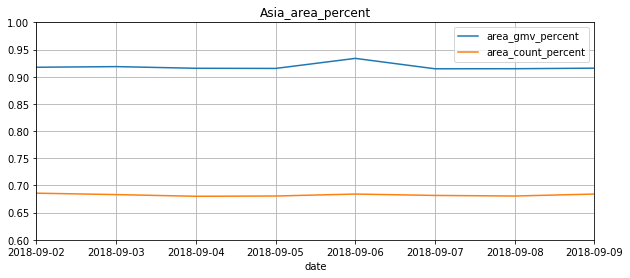

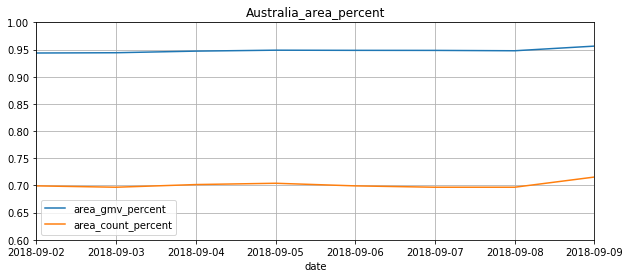

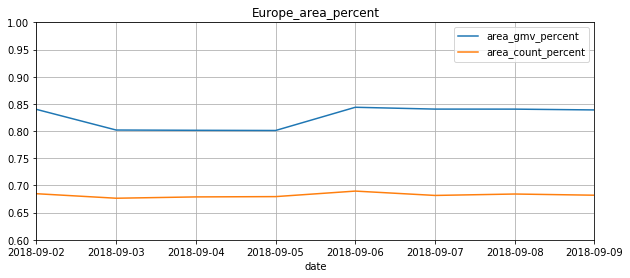

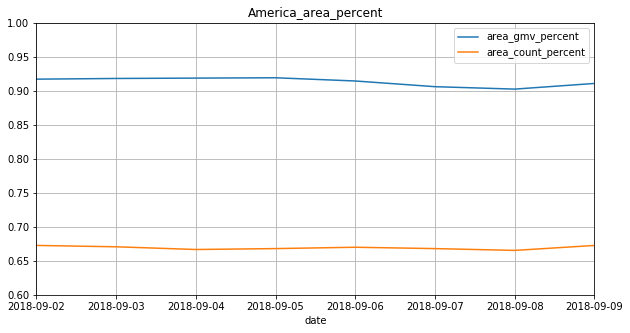

In [139]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(100,100))
df_end[df_end['区域']=='亚洲'].plot(x='date',y=['area_gmv_percent','area_count_percent'], ylim=[0.6,1],figsize=(10,4),grid=True,title='Asia_area_percent')
df_end[df_end['区域']=='大洋洲'].plot(x='date',y=['area_gmv_percent','area_count_percent'],ylim=[0.6,1],figsize=(10,4),grid=True,title='Australia_area_percent')
df_end[df_end['区域']=='欧洲'].plot(x='date',y=['area_gmv_percent','area_count_percent'],ylim=[0.6,1],figsize=(10,4),grid=True,title='Europe_area_percent')
df_end[df_end['区域']=='北美洲'].plot(x='date',y=['area_gmv_percent','area_count_percent'],ylim=[0.6,1],figsize=(10,5),grid=True,title='America_area_percent')

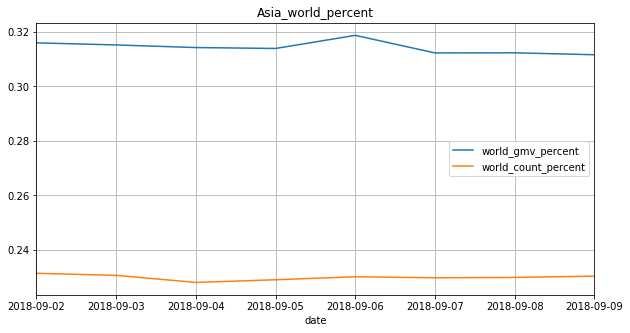

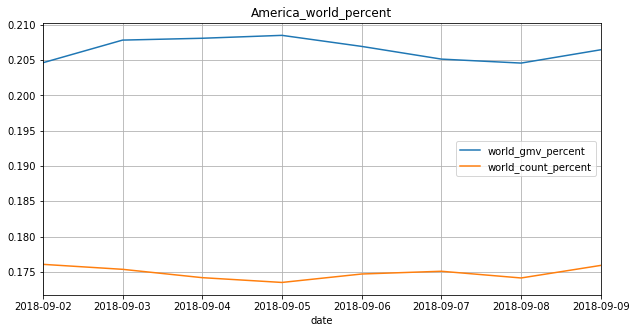

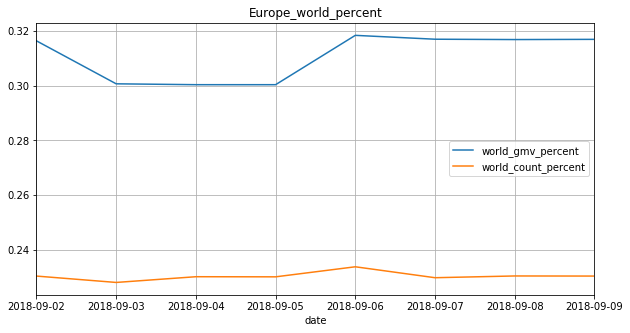

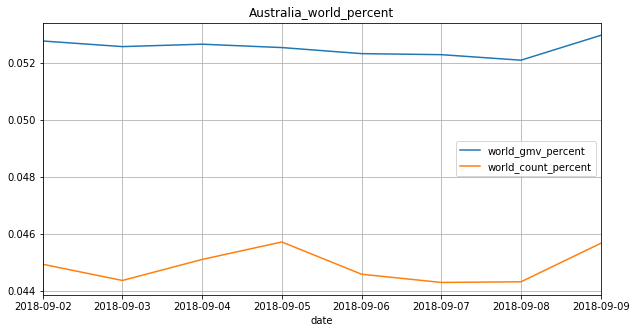

In [133]:

df_end[df_end['区域']=='亚洲'].plot(x='date',y=['world_gmv_percent','world_count_percent'],figsize=(10,5),grid=True,title='Asia_world_percent')
df_end[df_end['区域']=='北美洲'].plot(x='date',y=['world_gmv_percent','world_count_percent'],figsize=(10,5),grid=True,title='America_world_percent')
df_end[df_end['区域']=='欧洲'].plot(x='date',y=['world_gmv_percent','world_count_percent'],figsize=(10,5),grid=True,title='Europe_world_percent')
df_end[df_end['区域']=='大洋洲'].plot(x='date',y=['world_gmv_percent','world_count_percent'],figsize=(10,5),grid=True,title='Australia_world_percent')


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_excel("data/returnbill20180927.xlsx")
df.head(5)

,ReturnApplyBillId,OrderId,BuyerId,BuyerLoginId,SellerId,SellerLoginId,Type,OrderPrice,ReturnAmount,ReturnReasonId,...,CatalogId,ReturnFreihtAmount,CanFastReturn,IsFastReturn,ResponsableType,ResponsableRemark,IsCancelOrder,ResponsableResonId,ResponsableOpId,ResponsableOpName
0,TH180923000080314,1040889439,6439439,6439438.weixin,2645083,上野机器猫,0,101.00,43.00,77,...,e3acd478-98e6-443a-a2bb-c8c61ebc2e1d,0,0,0,6,系统自动判定为非买手责任,0,5,-1,系统
1,TH180923000080325,1041001325,21941325,Quinn_Rc,21035089,琪琪家韩妆正品,0,262.00,262.00,79,...,1ba958ad-4980-4c69-94e6-511bdc0737b2,0,0,0,6,系统自动判定为非买手责任,0,6,-1,系统
2,TH180923000080403,1042215720,21825720,Sheybaobao,602445,纽英伦温莎总行,0,274.00,274.00,74,...,fc9b58e0-1c8c-4095-acc6-c46da79c8d67,0,0,0,1,NaN,0,1,1096,李师雄
3,TH180923000080408,1040841528,15281528,执迷不悔321,7375220,董董韩妆,0,65.00,65.00,77,...,0d42ce58-2fcc-4fe8-b479-f1597523e18c,0,0,0,6,系统自动判定为非买手责任,0,5,-1,系统
4,TH180923000080425,1051340073,20120073,lreneyang,17930822,hahamall海外直邮,0,456.23,456.23,76,...,44855dfd-3d61-467e-9ef9-a01eed0a8085,0,0,0,0,系统自动判定为买手责任,0,4,-1,系统
